In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
#perch : 농어

In [ ]:
#훈련 세트와 테스트 세트 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

K-최근접 이웃의 한계

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련
Knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 길이가 50cm인 농어의 무게 예측
print(Knr.predict([[50]]))

[1033.33333333]


그러나 농어의 무게는 1.5kg가 정답

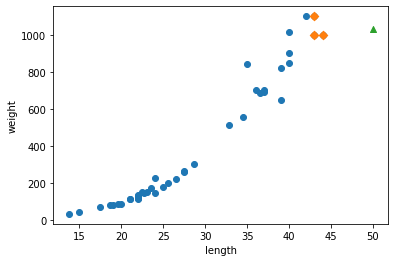

In [ ]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구합니다
distancs, indexes = Knr.kneighbors([[50]])

#훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes],marker='D') #plt.scatter(x축, y축, marker="원하는 모양");

# 50cm 농어 데이터 초록색
plt.scatter(50,1033,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(np.mean(train_target[indexes]))# 샘플들의 무게 평균

1033.3333333333333


훈련 세트의 범위를 벗어나면 결과와 다르게 가장 비슷한 값 예측하는 단점이 있다.
길이가 100cm인 농어도 1,033g

In [ ]:
# 100cm 농어의 이웃을 구하기
print(Knr.predict([[50]]))

[1033.33333333]


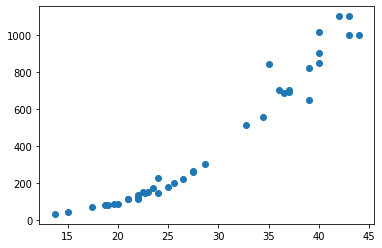

In [ ]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input,train_target)


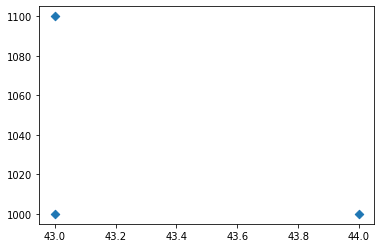

In [ ]:
# 훈련 세트 중에서 이웃 셈플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes],marker='D')

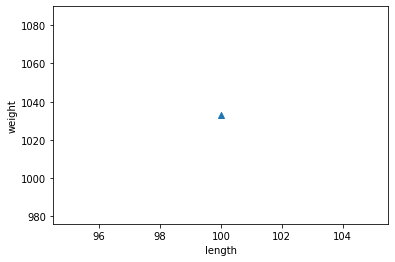

In [ ]:
# 100cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

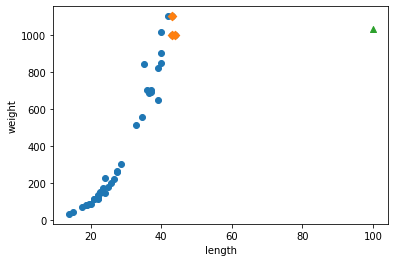

In [ ]:
#합치기

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker='D')
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 삼각형 농어가 아무리 커도 무게가 늘어나지 않는 문제가 생긴다.